# Prediction of creditworthiness for credit card applications

In [1130]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report



In [1131]:
credit_df = pd.read_csv('data/credit_record.csv')
application_df = pd.read_csv('data/application_record.csv')
credit_df.head(30)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [1132]:
application_df.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [1133]:
print(np.isin(credit_df['ID'], application_df['ID']).sum())
print((credit_df['ID'].shape)[0])

777715
1048575


In [1134]:
credit_df = credit_df[credit_df['ID'].isin(application_df['ID'])]
credit_df.reset_index(drop=True, inplace=True)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5008804,0,C
1,5008804,-1,C
2,5008804,-2,C
3,5008804,-3,C
4,5008804,-4,C


In [1135]:
credit_df['ID'].value_counts()

ID
5148819    61
5115964    61
5061741    61
5078799    61
5061685    61
           ..
5139553     1
5069020     1
5097025     1
5023604     1
5092141     1
Name: count, Length: 36457, dtype: int64

In [1136]:
value_counts = credit_df['ID'].value_counts()
idx = value_counts[value_counts > 18].index
credit_df = credit_df[credit_df["ID"].isin(idx)]

credit_df.reset_index(drop=True, inplace=True)
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5008806,0,C
1,5008806,-1,C
2,5008806,-2,C
3,5008806,-3,C
4,5008806,-4,C


In [1137]:
approved_applications = application_df[np.isin(application_df['ID'], credit_df['ID'])]
approved_applications.reset_index(drop=True, inplace=True)
approved_applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
5,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
6,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0
7,5008831,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0
8,5008832,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0
9,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0


In [1138]:
approved_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17563 entries, 0 to 17562
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17563 non-null  int64  
 1   CODE_GENDER          17563 non-null  object 
 2   FLAG_OWN_CAR         17563 non-null  object 
 3   FLAG_OWN_REALTY      17563 non-null  object 
 4   CNT_CHILDREN         17563 non-null  int64  
 5   AMT_INCOME_TOTAL     17563 non-null  float64
 6   NAME_INCOME_TYPE     17563 non-null  object 
 7   NAME_EDUCATION_TYPE  17563 non-null  object 
 8   NAME_FAMILY_STATUS   17563 non-null  object 
 9   NAME_HOUSING_TYPE    17563 non-null  object 
 10  DAYS_BIRTH           17563 non-null  int64  
 11  DAYS_EMPLOYED        17563 non-null  int64  
 12  FLAG_MOBIL           17563 non-null  int64  
 13  FLAG_WORK_PHONE      17563 non-null  int64  
 14  FLAG_PHONE           17563 non-null  int64  
 15  FLAG_EMAIL           17563 non-null 

In [1139]:
for column in approved_applications.columns:
    if column == "ID":
        continue
    print("--------------------")
    print(column, approved_applications[column].nunique())
    print(approved_applications[column].value_counts())
    print("--------------------")
    

--------------------
CODE_GENDER 2
CODE_GENDER
F    11622
M     5941
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    10566
Y     6997
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    11498
N     6065
Name: count, dtype: int64
--------------------
--------------------
CNT_CHILDREN 8
CNT_CHILDREN
0     12157
1      3533
2      1619
3       211
4        32
5         7
14        2
7         2
Name: count, dtype: int64
--------------------
--------------------
AMT_INCOME_TOTAL 216
AMT_INCOME_TOTAL
135000.0    2019
180000.0    1580
112500.0    1404
157500.0    1380
225000.0    1361
            ... 
190399.5       1
191700.0       1
160200.0       1
73575.0        1
215100.0       1
Name: count, Length: 216, dtype: int64
--------------------
--------------------
NAME_INCOME_TYPE 5
NAME_INCOME_TYPE
Working                 9013
Commercial associate    4175
Pensioner               2840


In [1140]:
(approved_applications[(approved_applications['DAYS_EMPLOYED'] > 0) & (approved_applications['NAME_INCOME_TYPE'] == 'Pensioner')].shape)[0]

2829

In [1141]:
for column in application_df.columns:
    if column == "ID":
        continue
    print("--------------------")
    print(column, application_df[column].nunique())
    print(application_df[column].value_counts())
    print("--------------------")

--------------------
CODE_GENDER 2
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
--------------------
--------------------
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
--------------------
--------------------
CNT_CHILDREN 12
CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64
--------------------
--------------------
AMT_INCOME_TOTAL 866
AMT_INCOME_TOTAL
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: count, Length: 866, dtype: int64
--------------------
--------------------
NAME_INCOME_TYPE 5
NAME_INCOME_TYPE
Working  

NAME_EDUCATION_TYPE 5
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
--------------------
--------------------
NAME_FAMILY_STATUS 5
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64
--------------------
--------------------
NAME_HOUSING_TYPE 6
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64
--------------------
--------------------
DAYS_BIRTH 16379
DAYS_BIRTH
-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-8207       1
-8286       1
-

In [1142]:
(application_df[(application_df['DAYS_EMPLOYED'] > 0) & (application_df['NAME_INCOME_TYPE'] == 'Pensioner')].shape)[0]


75329

In [1143]:
print(application_df[application_df['DAYS_EMPLOYED'] == 0].shape[0])
print(approved_applications[approved_applications['DAYS_EMPLOYED'] == 0].shape[0])


0
0


In [1144]:
approved_applications.loc[approved_applications['DAYS_EMPLOYED'] > 0, 'OCCUPATION_TYPE'] = "Unemployed"

In [1145]:
def rename_columns(df, column_name, new_column_name):
    df.rename(columns={column_name: new_column_name}, inplace=True)
    return df

In [1146]:
# iDEA: analizzo il dataset di quelli che hanno ricevuto la carta di credito. In base a questi campioni, mi faccio "un'idea" di come dovrebbe essere un cliente che 
# riceve la carta di credito. Poi, analizzo il dataset di tutti i clienti e vedo se ci sono delle differenze significative. 
# Se ci sono, allora posso dire che ci sono delle caratteristiche che influenzano il fatto di ricevere la carta di credito o meno.
# Inoltre posso valutare tra i clienti che hanno ricevuto la carta, quelli che sono affidabili e quelli che non lo sono.


In [1147]:
def preprocess_dataframe(data):
    data.loc[:, 'DAYS_BIRTH'] = data['DAYS_BIRTH'].map(lambda x: int(-x / 365) if x < 0 else 0)
    data.loc[:, 'DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: int(-x / 365) if x < 0 else 0) 
    data = rename_columns(data, 'DAYS_BIRTH', 'AGE')
    data = rename_columns(data, 'DAYS_EMPLOYED', 'YEARS_EMPLOYED')
    data = data.drop(columns=["CODE_GENDER", "CNT_CHILDREN"])
    #data.loc[:, "AVAILABILITY"] = (data["FLAG_MOBIL"] + data["FLAG_WORK_PHONE"] + data["FLAG_PHONE"] + data["FLAG_EMAIL"])/4
    #data = data.drop(columns=["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])
    #marriage_mapper = {"Single / not married": 0, "Married": 1, "Civil marriage": 1, "Separated": 2, "Widow": 3}
    #data.loc[:, "NAME_FAMILY_STATUS"] = data["NAME_FAMILY_STATUS"].map(marriage_mapper)

    return data

In [1148]:
approved_applications = preprocess_dataframe(approved_applications)

/tmp/ipykernel_253041/198459180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={column_name: new_column_name}, inplace=True)


In [1149]:
approved_applications.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3,1,0,0,0,Security staff,2.0
1,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0
2,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1.0
3,5112956,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46,2,1,1,1,1,Accountants,2.0
4,5008825,Y,N,130500.0,Working,Incomplete higher,Married,House / apartment,29,3,1,0,0,0,Accountants,2.0


In [1150]:
print("Unique ID : ", credit_df['ID'].nunique())
print(credit_df['MONTHS_BALANCE'].value_counts())
credit_df[credit_df['ID'] == 5008809]

Unique ID :  17563
MONTHS_BALANCE
-18    16252
-17    16131
-16    16017
-15    15888
-19    15835
       ...  
-56     1260
-57      986
-58      755
-59      501
-60      255
Name: count, Length: 61, dtype: int64


,ID,MONTHS_BALANCE,STATUS


In [1151]:
round(approved_applications[["AMT_INCOME_TOTAL", "AGE", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]].describe(), 2)

,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
count,17563.00,17563.00,17563.00,17563.00
mean,189742.20,43.68,6.04,2.22
std,102407.39,11.14,6.64,0.91
min,27000.00,21.00,0.00,1.00
25%,126000.00,34.00,1.00,2.00
50%,166500.00,43.00,4.00,2.00
75%,225000.00,53.00,9.00,3.00
max,1575000.00,68.00,42.00,15.00


In [1152]:
class Client:
    def __init__(self, id, info, credit_info):
        self.id = id
        self._info = info
        self._credit_info = credit_info
        self.status = credit_info['STATUS'].value_counts()
        self.history = credit_info.shape[0]
        self.pay_stats = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, 'C':0, 'X':0}
        self._get_pay_stats()
        self.reliability = 0
        self.bad_client = 0
        self._reliability_setted = False
        
    def __str__(self):
        return "ID: " + str(self.id) + " Status: " + str(self.status) + " history: " + str(self.history) + " History Status Reliability: " + str(self.get_history_reliability) + " Last Period Status Reliability: " + str(self.get_last_period_status_reliability)
    
    def __repr__(self):
        return "ID: " + str(self.id) + " Status: " + str(self.status) + " history: " + str(self.history) + " History Status Reliability: " + str(self.get_history_reliability) + " Last Period Status Reliability: " + str(self.get_last_period_status_reliability)
    
    def _get_pay_stats(self):
        for k in self.status.keys():
            if(k in self.status.index):
                self.pay_stats[k] = self.status[k]/self.history

    def get_history_reliability(self):        
        if self.pay_stats['5'] > 0.1:
            return 0
        elif self.pay_stats['5'] > 0.05 or self.pay_stats['4'] > 0.15:
            return 1
        elif self.pay_stats['4'] > 0.05 or self.pay_stats['3'] > 0.15:
            return 2
        elif self.pay_stats['3'] > 0.05 or self.pay_stats['2'] > 0.15:
            return 3
        elif self.pay_stats['2'] > 0.05 or self.pay_stats['1'] > 0.15:
            return 4
        elif self.pay_stats['1'] > 0.05 or self.pay_stats['0'] > 0.15:
            return 5
        elif self.pay_stats['0'] > 0.05 or self.pay_stats['C'] < 0.65:
            return 6
        return 7

    def get_last_period_reliability(self):
        last_period_check = 6
        reliability = 7
        i = 0
        for _, row in self._credit_info.iterrows():
            if i == last_period_check:
                break
            if row['STATUS'] == '5':
                reliability = int(reliability*0.1) 
            elif row['STATUS'] == '4': 
                reliability = int(reliability*0.15)
            elif row['STATUS'] == '3':
                reliability = int(reliability*0.2)
            elif row['STATUS'] == '2':
                reliability = int(reliability*0.40)
            elif row['STATUS'] == '1':
                reliability = int(reliability*0.60)
            elif row['STATUS'] == '0':
                reliability = reliability*1.1 if reliability*1.1 < 6 else 6
            elif row['STATUS'] == 'C' or row['STATUS'] == 'X':
                reliability = reliability*1.2 if reliability*1.2 < 7 else 7
            i+=1
        return reliability
        
    def set_reliability(self):
        self.reliability = int((self.get_history_reliability() * 0.75 + self.get_last_period_reliability() * 0.25))
        if self.reliability < 5:
            self.bad_client = 1
        self._reliability_setted = True

    def get_reliability(self):
        if not self._reliability_setted:
            self.set_reliability()
        return self.reliability
    
    def get_bad_client(self):
        if not self._reliability_setted:
            self.set_reliability()
        return self.bad_client

    def get_client_status(self):
        return self.status
    
    def get_client_history(self):
        return self.history
    
    def get_client_id(self):
        return self.id

In [1153]:
ids = approved_applications['ID'].unique()
clients_creditworthiness = { "CLIENT_RELIABILITY": [], "BAD_CLIENT": []}

for id in ids:
    client=Client(id, approved_applications[(approved_applications['ID'] == id).drop(columns=['ID'])], credit_df[(credit_df['ID'] == id).drop(columns=['ID'])])
    clients_creditworthiness["CLIENT_RELIABILITY"].append(client.get_reliability())
    clients_creditworthiness["BAD_CLIENT"].append(client.get_bad_client())

approved_applications = approved_applications.join(pd.DataFrame(clients_creditworthiness))
       

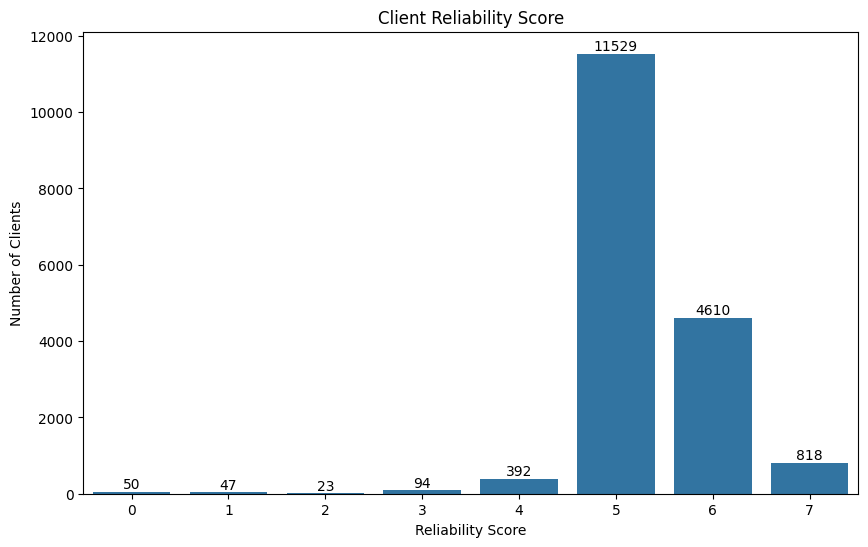

In [1154]:
_, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='CLIENT_RELIABILITY', data=approved_applications)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Reliability Score')
plt.ylabel('Number of Clients')
plt.title('Client Reliability Score')
plt.show()



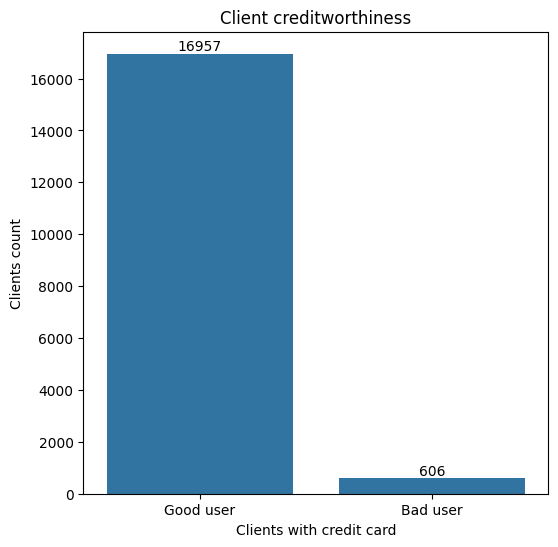

In [1155]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='BAD_CLIENT', data=approved_applications)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Good user', 'Bad user'])
plt.xlabel('Clients with credit card')
plt.ylabel('Clients count')
plt.title('Client creditworthiness')
plt.show()

In [1156]:
approved_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17563 entries, 0 to 17562
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17563 non-null  int64  
 1   FLAG_OWN_CAR         17563 non-null  object 
 2   FLAG_OWN_REALTY      17563 non-null  object 
 3   AMT_INCOME_TOTAL     17563 non-null  float64
 4   NAME_INCOME_TYPE     17563 non-null  object 
 5   NAME_EDUCATION_TYPE  17563 non-null  object 
 6   NAME_FAMILY_STATUS   17563 non-null  object 
 7   NAME_HOUSING_TYPE    17563 non-null  object 
 8   AGE                  17563 non-null  int64  
 9   YEARS_EMPLOYED       17563 non-null  int64  
 10  FLAG_MOBIL           17563 non-null  int64  
 11  FLAG_WORK_PHONE      17563 non-null  int64  
 12  FLAG_PHONE           17563 non-null  int64  
 13  FLAG_EMAIL           17563 non-null  int64  
 14  OCCUPATION_TYPE      15036 non-null  object 
 15  CNT_FAM_MEMBERS      17563 non-null 

In [1157]:
print("Percentage of Nan values in occupation type: %.2f%%" % (approved_applications['OCCUPATION_TYPE'].isna().sum() *100 /approved_applications.shape[0]))

Percentage of Nan values in occupation type: 14.39%


In [1158]:
approved_applications = approved_applications.drop(columns=["OCCUPATION_TYPE"])

In [1159]:
RANDOM_STATE = 7
columns_to_ordinal_encode = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]
columns_to_one_hot_encode = ["NAME_FAMILY_STATUS", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE"]
columns_to_scale = ["AMT_INCOME_TOTAL", "AGE", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]
columns_not_to_encode = ["FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]

X = approved_applications.drop(columns=['ID', 'CLIENT_RELIABILITY', 'BAD_CLIENT', 'FLAG_MOBIL'])
y = approved_applications['BAD_CLIENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

column_transformer = ColumnTransformer([
    ('ORDINAL', OrdinalEncoder( ), columns_to_ordinal_encode),
    ('OHE', OneHotEncoder(sparse_output=False), columns_to_one_hot_encode),
    ], 
    remainder='passthrough')

column_transformer.set_output(transform='pandas')
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)
X_train = X_train.astype('int64')
X_test = X_test.astype('int64')

In [1160]:
def rename_column_without_remainder(X_train, X_test):
    remainder ="remainder__"
    for column in X_train.columns:
        if remainder in column:
            X_train.rename(columns={column: column.replace(remainder, "")}, inplace=True)
            X_test.rename(columns={column: column.replace(remainder, "")}, inplace=True)

rename_column_without_remainder(X_train, X_test)
X_train.head()

,ORDINAL__FLAG_OWN_CAR,ORDINAL__FLAG_OWN_REALTY,OHE__NAME_FAMILY_STATUS_Civil marriage,OHE__NAME_FAMILY_STATUS_Married,OHE__NAME_FAMILY_STATUS_Separated,OHE__NAME_FAMILY_STATUS_Single / not married,OHE__NAME_FAMILY_STATUS_Widow,OHE__NAME_INCOME_TYPE_Commercial associate,OHE__NAME_INCOME_TYPE_Pensioner,OHE__NAME_INCOME_TYPE_State servant,...,OHE__NAME_HOUSING_TYPE_Office apartment,OHE__NAME_HOUSING_TYPE_Rented apartment,OHE__NAME_HOUSING_TYPE_With parents,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
294,1,0,0,1,0,0,0,0,0,0,...,0,0,0,135000,52,0,1,0,0,2
15537,1,0,0,1,0,0,0,0,0,0,...,0,0,0,234000,35,13,1,0,0,3
11916,1,0,1,0,0,0,0,0,0,0,...,0,0,0,270000,41,1,1,1,0,2
7788,0,1,0,1,0,0,0,0,0,0,...,0,0,0,157500,47,2,0,0,0,2
15759,1,1,0,1,0,0,0,0,0,1,...,0,0,0,121500,54,8,1,0,0,2


In [1161]:
std_scaler_transformer = ColumnTransformer([
    ('STD_SCALER', StandardScaler(), columns_to_scale)
    ], 
    remainder='passthrough')
std_scaler_transformer.set_output(transform='pandas')
X_train_std = std_scaler_transformer.fit_transform(X_train)
X_test_std = std_scaler_transformer.transform(X_test)
X_train_std = X_train_std.astype('int64')
X_test_std = X_test_std.astype('int64')
rename_column_without_remainder(X_train_std, X_test_std)
X_train_std.head()


,STD_SCALER__AMT_INCOME_TOTAL,STD_SCALER__AGE,STD_SCALER__YEARS_EMPLOYED,STD_SCALER__CNT_FAM_MEMBERS,ORDINAL__FLAG_OWN_CAR,ORDINAL__FLAG_OWN_REALTY,OHE__NAME_FAMILY_STATUS_Civil marriage,OHE__NAME_FAMILY_STATUS_Married,OHE__NAME_FAMILY_STATUS_Separated,OHE__NAME_FAMILY_STATUS_Single / not married,...,OHE__NAME_EDUCATION_TYPE_Secondary / secondary special,OHE__NAME_HOUSING_TYPE_Co-op apartment,OHE__NAME_HOUSING_TYPE_House / apartment,OHE__NAME_HOUSING_TYPE_Municipal apartment,OHE__NAME_HOUSING_TYPE_Office apartment,OHE__NAME_HOUSING_TYPE_Rented apartment,OHE__NAME_HOUSING_TYPE_With parents,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
294,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
15537,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
11916,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,1,0
7788,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
15759,0,0,0,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [1162]:
print(approved_applications["BAD_CLIENT"].value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

BAD_CLIENT
0    16957
1      606
Name: count, dtype: int64
BAD_CLIENT
0    11881
1      413
Name: count, dtype: int64
BAD_CLIENT
0    5076
1     193
Name: count, dtype: int64


In [1163]:
smote = SMOTE(random_state=RANDOM_STATE)
X_train_std_smt, y_train_smote = smote.fit_resample(X_train_std, y_train)
print("SMOTE: ", y_train_smote.value_counts())

rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_stdrus, y_train_rus = rus.fit_resample(X_train_std, y_train)
print("Undersampling: ", y_train_rus.value_counts())


SMOTE:  BAD_CLIENT
0    11881
1    11881
Name: count, dtype: int64
Undersampling:  BAD_CLIENT
0    413
1    413
Name: count, dtype: int64


In [1164]:
import re
def generate_confusion_matrix(axes : plt.Axes, matrix : np.ndarray, title=None):
    axes.text(0, 2.3, f"Precision: {(matrix[1][1]/(matrix[1][1]+matrix[0][1])):.3f}") 
    axes.text(1, 2.3, f"Recall: {(matrix[1][1]/(matrix[1][1]+matrix[1][0])):.3f}") 
    axes.xaxis.set_ticklabels(['Predicted Good Client', 'Predicted Bad Client'])
    axes.yaxis.set_ticklabels(['Good Client', 'Bad Client'])
    if title:
        axes.set_title(title, fontsize=10.5)
    return axes

def print_train_test_confusion_matrix(train_matrix : np.ndarray, test_matrix : np.ndarray, train_title=None, test_title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
    sns.heatmap(train_matrix, annot=True, cmap="Greens", fmt='g', ax=ax1)
    ax1 = generate_confusion_matrix(ax1, train_matrix, train_title)

    sns.heatmap(test_matrix, annot=True, cmap="Greens", fmt='g', ax=ax2)
    ax2 = generate_confusion_matrix(ax2, test_matrix, test_title)
    plt.show()

def get_accuracy_from_classification_report(report):
    numerical_values = re.findall(r"[-+]?\d*\.\d+|\d+", report.split("\n")[5])
    return float(numerical_values[0])

def perform_logistic_regression(X_train, y_train, X_test, y_test, threshold=0.5):
    log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred_proba = log_reg.predict_proba(X_train)
    y_pred_train = np.where(y_pred_proba[:,1]>threshold, 1, 0)
    report = classification_report(y_train, y_pred_train)
    accuracy = get_accuracy_from_classification_report(report)
    print("Train Set Accuracy: ", accuracy)
    print(report)
    print("--------------------")

    y_pred_proba = log_reg.predict_proba(X_test)
    y_pred = np.where(y_pred_proba[:,1]>threshold, 1, 0)
    report_test = classification_report(y_test, y_pred)
    accuracy_test = get_accuracy_from_classification_report(report_test)
    print("Test Set Accuracy: ", accuracy_test)
    print(report_test)
    print_train_test_confusion_matrix(train_matrix=confusion_matrix(y_train, y_pred_train), test_matrix=confusion_matrix(y_test, y_pred), 
                           train_title="Train Set\n\n", test_title="Test Set\n\n")
    return log_reg, report, report_test

Train Set Accuracy:  0.71
              precision    recall  f1-score   support

           0       0.67      0.81      0.74     11881
           1       0.76      0.61      0.67     11881

    accuracy                           0.71     23762
   macro avg       0.72      0.71      0.71     23762
weighted avg       0.72      0.71      0.71     23762

--------------------
Test Set Accuracy:  0.78
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      5076
           1       0.04      0.25      0.08       193

    accuracy                           0.78      5269
   macro avg       0.50      0.52      0.47      5269
weighted avg       0.93      0.78      0.84      5269



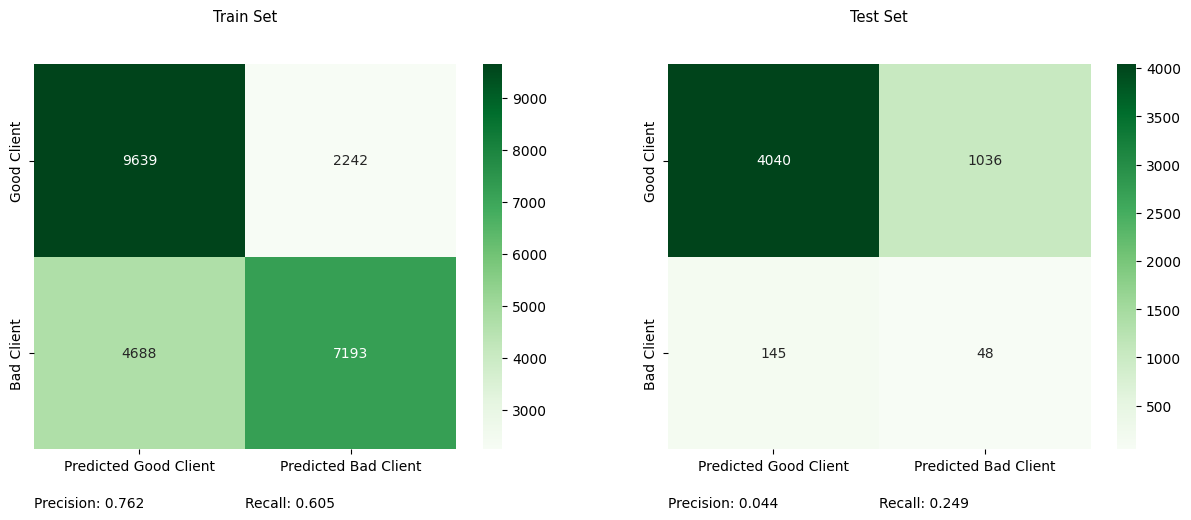

In [1165]:
log_reg_smt, report_train_smt, report_test_smt = perform_logistic_regression(X_train_std_smt, y_train_smote, X_test_std, y_test)

Train Set Accuracy:  0.59
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       413
           1       0.60      0.54      0.56       413

    accuracy                           0.59       826
   macro avg       0.59      0.59      0.59       826
weighted avg       0.59      0.59      0.59       826

--------------------
Test Set Accuracy:  0.58
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      5076
           1       0.04      0.41      0.07       193

    accuracy                           0.58      5269
   macro avg       0.50      0.50      0.40      5269
weighted avg       0.93      0.58      0.71      5269



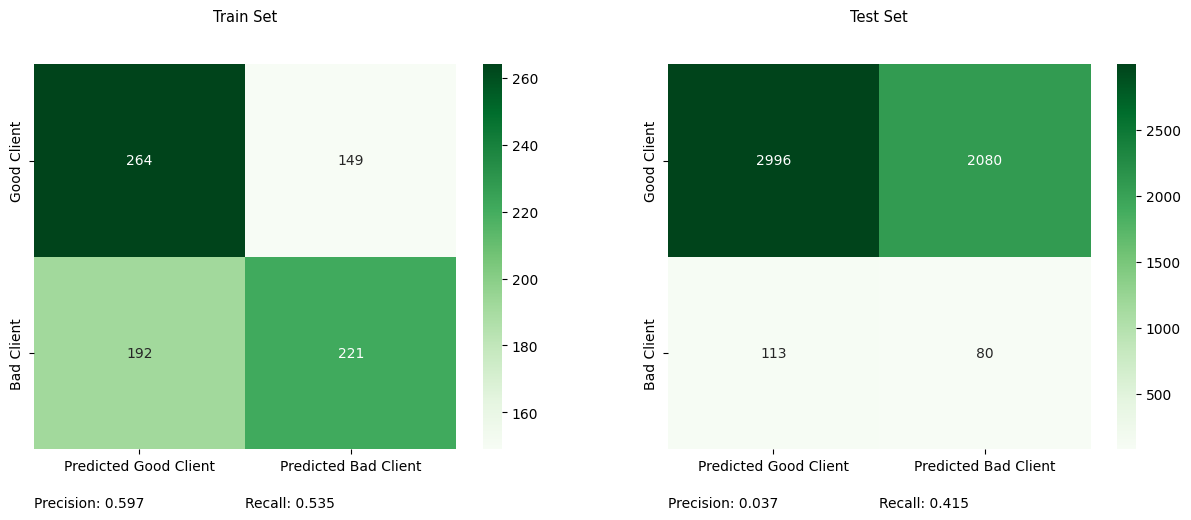

In [1166]:
log_reg_ru = perform_logistic_regression(X_train_stdrus, y_train_rus, X_test_std, y_test)

In [1178]:
smote = SMOTE(sampling_strategy=0.3, random_state=RANDOM_STATE)
X_train_std_smt03, y_train_smt03 = smote.fit_resample(X_train_std, y_train)
under = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_std_smt03rus, y_train_smt03rus = under.fit_resample(X_train_std_smt03, y_train_smt03)

print(y_train_smt03rus.value_counts())
print(X_train_std_smt03rus.shape)

BAD_CLIENT
0    3564
1    3564
Name: count, dtype: int64
(7128, 30)


Train Set Accuracy:  0.69
              precision    recall  f1-score   support

           0       0.66      0.80      0.72      3564
           1       0.74      0.59      0.65      3564

    accuracy                           0.69      7128
   macro avg       0.70      0.69      0.69      7128
weighted avg       0.70      0.69      0.69      7128

--------------------
Test Set Accuracy:  0.76
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5076
           1       0.04      0.26      0.07       193

    accuracy                           0.76      5269
   macro avg       0.50      0.52      0.47      5269
weighted avg       0.93      0.76      0.83      5269



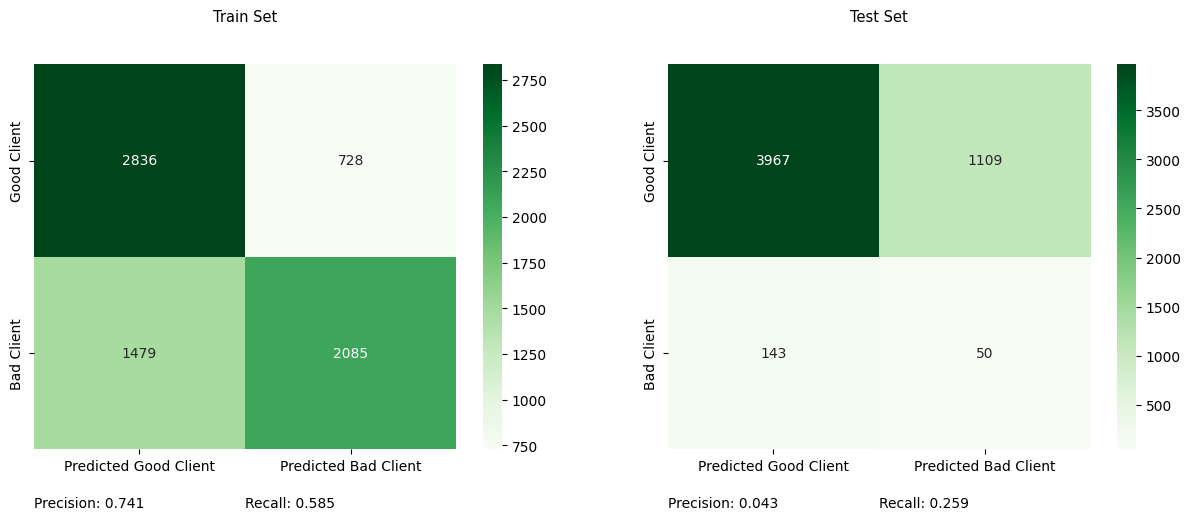

In [1179]:
log_reg_smt03rus = perform_logistic_regression(X_train_std_smt03rus, y_train_smt03rus, X_test_std, y_test)

In [1202]:
X_train.head()

,ORDINAL__FLAG_OWN_CAR,ORDINAL__FLAG_OWN_REALTY,OHE__NAME_FAMILY_STATUS_Civil marriage,OHE__NAME_FAMILY_STATUS_Married,OHE__NAME_FAMILY_STATUS_Separated,OHE__NAME_FAMILY_STATUS_Single / not married,OHE__NAME_FAMILY_STATUS_Widow,OHE__NAME_INCOME_TYPE_Commercial associate,OHE__NAME_INCOME_TYPE_Pensioner,OHE__NAME_INCOME_TYPE_State servant,...,OHE__NAME_HOUSING_TYPE_Office apartment,OHE__NAME_HOUSING_TYPE_Rented apartment,OHE__NAME_HOUSING_TYPE_With parents,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
294,1,0,0,1,0,0,0,0,0,0,...,0,0,0,135000,52,0,1,0,0,2
15537,1,0,0,1,0,0,0,0,0,0,...,0,0,0,234000,35,13,1,0,0,3
11916,1,0,1,0,0,0,0,0,0,0,...,0,0,0,270000,41,1,1,1,0,2
7788,0,1,0,1,0,0,0,0,0,0,...,0,0,0,157500,47,2,0,0,0,2
15759,1,1,0,1,0,0,0,0,0,1,...,0,0,0,121500,54,8,1,0,0,2


Text(0.5, 1.0, 'Correlation Matrix')

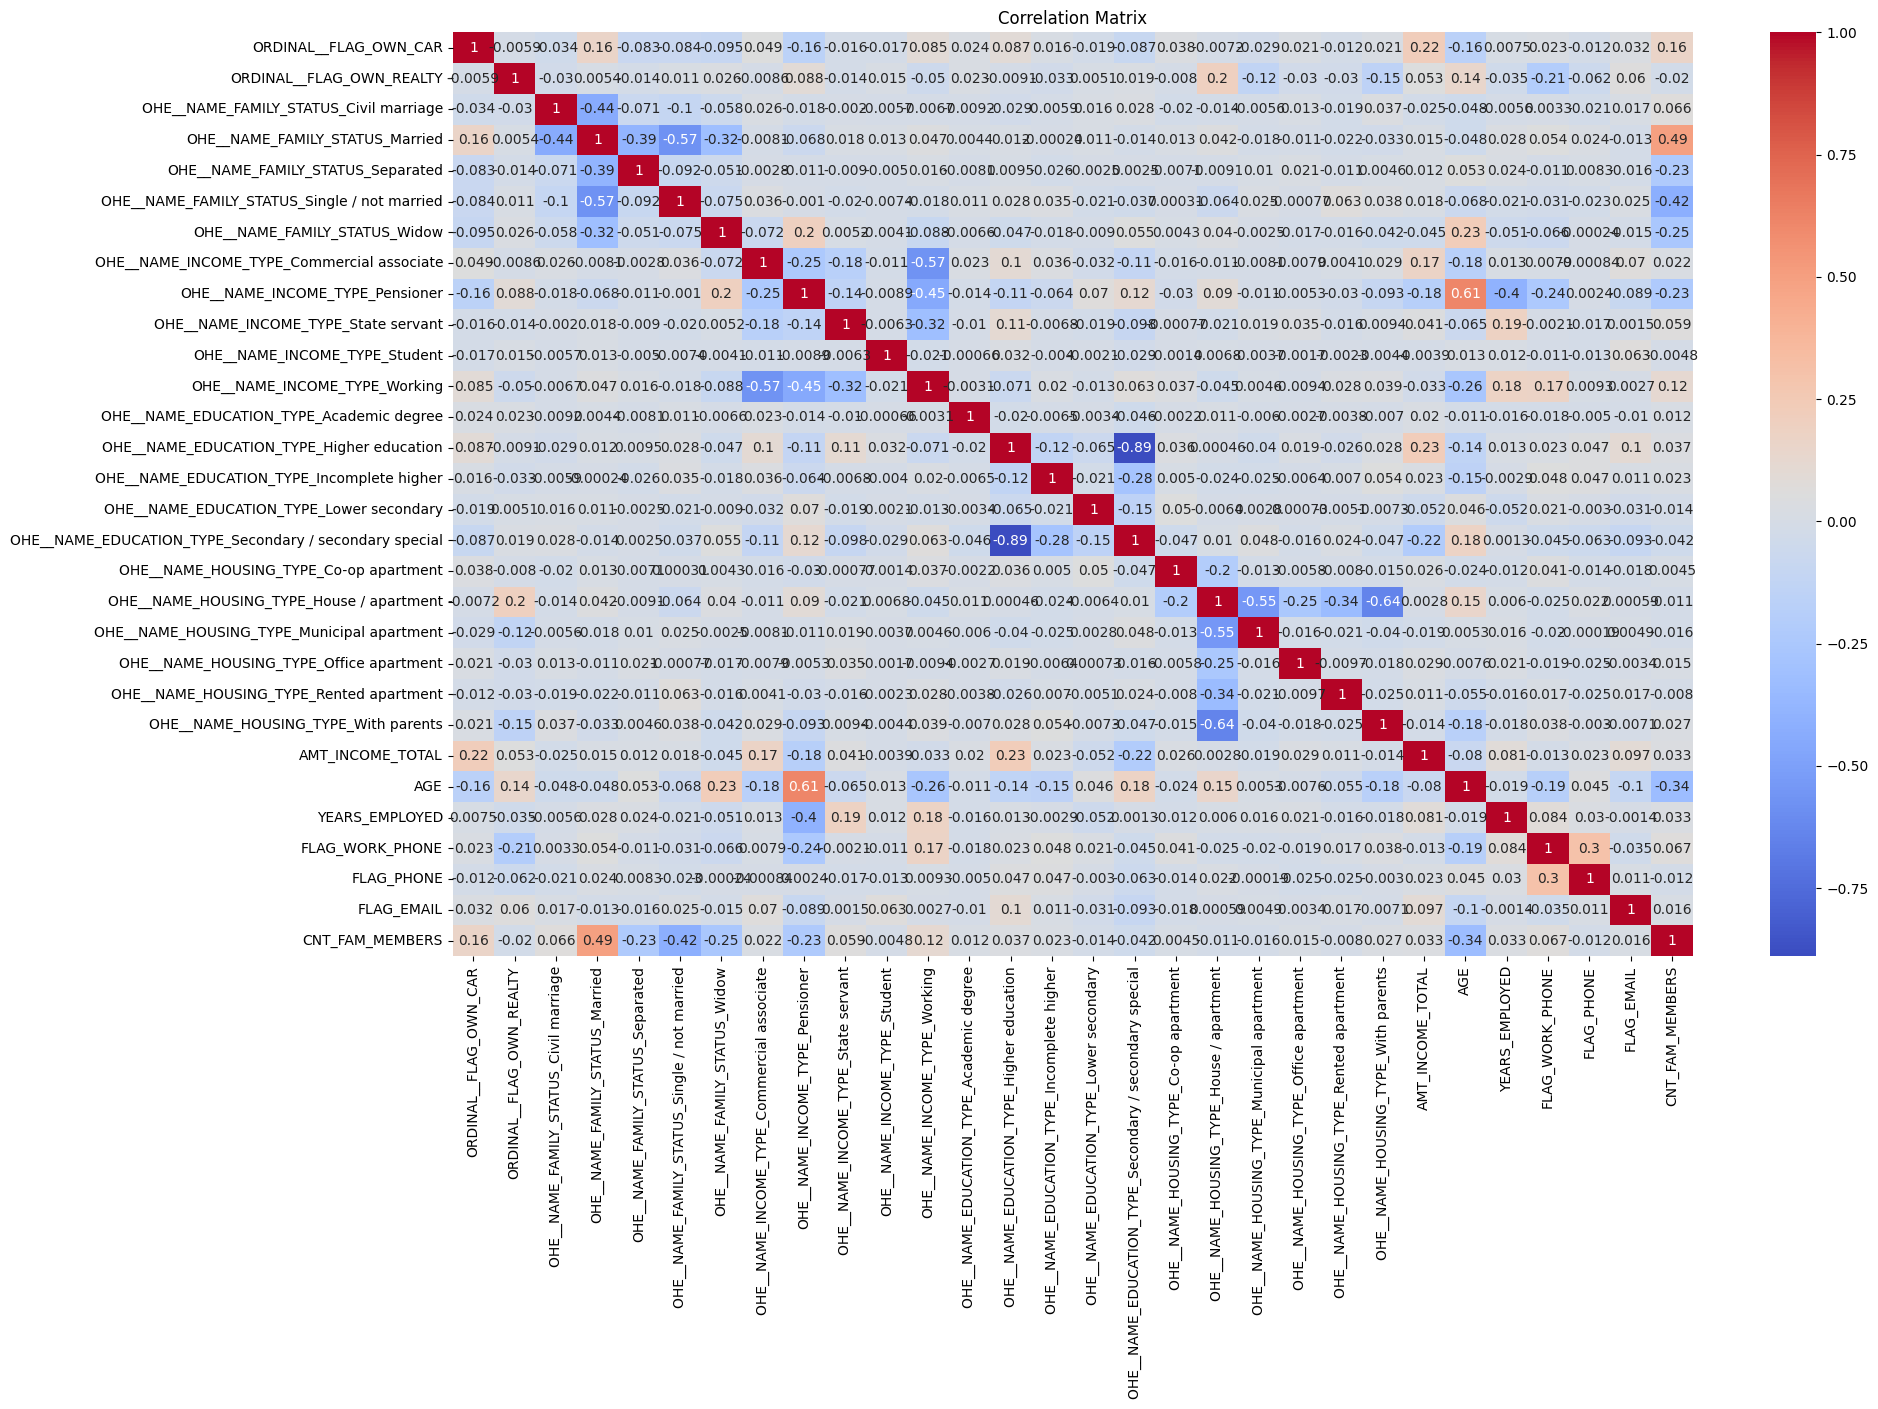

In [1205]:
corr = X_train.corr()
_, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")
plt.title("Correlation Matrix")

In [1216]:
X_train_rf = X_train.drop(columns=["OHE__NAME_INCOME_TYPE_Pensioner", "OHE__NAME_INCOME_TYPE_Student", "OHE__NAME_EDUCATION_TYPE_Higher education", "OHE__NAME_HOUSING_TYPE_Municipal apartment", "OHE__NAME_HOUSING_TYPE_House / apartment"])
X_test_rf = X_test.drop(columns=["OHE__NAME_INCOME_TYPE_Pensioner", "OHE__NAME_INCOME_TYPE_Student", "OHE__NAME_EDUCATION_TYPE_Higher education", "OHE__NAME_HOUSING_TYPE_Municipal apartment", "OHE__NAME_HOUSING_TYPE_House / apartment"])

In [1209]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rnd_forest = BalancedRandomForestClassifier(random_state=RANDOM_STATE,
    replacement=True, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'sampling_strategy': [0.5, 0.75, 1.]

}

grid_search = GridSearchCV(rnd_forest, param_grid, cv=5, scoring=['precision', 'recall'], refit='recall', n_jobs=-1)
grid_search.fit(X_train_rf, y_train)

print(grid_search.best_params_)


/home/enrmic/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/home/enrmic/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/home/enrmic/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/home/e

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'sampling_strategy': 1.0}


In [1217]:
best_rnd_forest = grid_search.best_estimator_
best_rnd_forest.fit(X_train_rf, y_train)
y_pred = np.where(best_rnd_forest.predict_proba(X_test_rf)[:,1]>0.5, 1, 0)
accuracy_score(y_test, y_pred)

0.6530650977415069

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      5076
           1       0.06      0.61      0.11       193

    accuracy                           0.65      5269
   macro avg       0.52      0.63      0.45      5269
weighted avg       0.94      0.65      0.76      5269



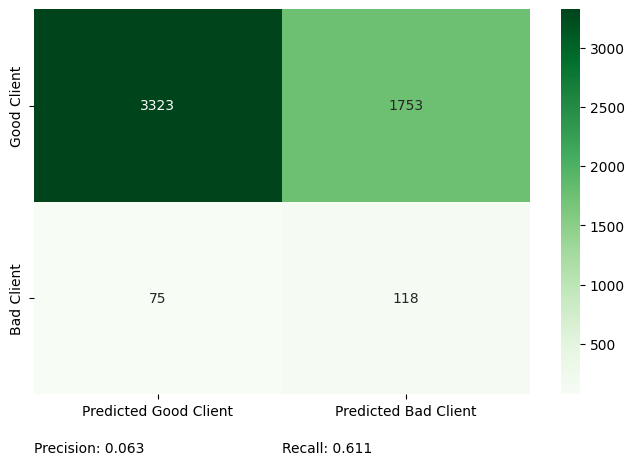

In [1218]:
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(matrix, annot=True, cmap="Greens", fmt='g')
ax = generate_confusion_matrix(ax, matrix)
plt.show()

In [1171]:
from sklearn.preprocessing import MinMaxScaler

norm_transformer = ColumnTransformer([
    ('NORM', MinMaxScaler(), columns_to_scale)
    ], 
    remainder='passthrough')

norm_transformer.set_output(transform='pandas')
X_train_norm = norm_transformer.fit_transform(X_train)
X_test_norm = norm_transformer.transform(X_test)
rename_column_without_remainder(X_train_norm, X_test_norm)
X_train_norm.head()

,NORM__AMT_INCOME_TOTAL,NORM__AGE,NORM__YEARS_EMPLOYED,NORM__CNT_FAM_MEMBERS,ORDINAL__FLAG_OWN_CAR,ORDINAL__FLAG_OWN_REALTY,OHE__NAME_FAMILY_STATUS_Civil marriage,OHE__NAME_FAMILY_STATUS_Married,OHE__NAME_FAMILY_STATUS_Separated,OHE__NAME_FAMILY_STATUS_Single / not married,...,OHE__NAME_EDUCATION_TYPE_Secondary / secondary special,OHE__NAME_HOUSING_TYPE_Co-op apartment,OHE__NAME_HOUSING_TYPE_House / apartment,OHE__NAME_HOUSING_TYPE_Municipal apartment,OHE__NAME_HOUSING_TYPE_Office apartment,OHE__NAME_HOUSING_TYPE_Rented apartment,OHE__NAME_HOUSING_TYPE_With parents,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
294,0.069767,0.652174,0.000000,0.071429,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
15537,0.133721,0.282609,0.309524,0.142857,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
11916,0.156977,0.413043,0.023810,0.071429,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,1,0
7788,0.084302,0.543478,0.047619,0.071429,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
15759,0.061047,0.695652,0.190476,0.071429,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [1172]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

smote = SMOTE(sampling_strategy=0.1, random_state=RANDOM_STATE)
X_train_std_smt03, y_train_smt03 = smote.fit_resample(X_train_norm, y_train)
under = RandomUnderSampler(sampling_strategy=0.75, random_state=RANDOM_STATE)
X_train_std_smt03rus, y_train_smt03rus = under.fit_resample(X_train_std_smt03, y_train_smt03)

print(y_train_smt03rus.value_counts())
print(X_train_std_smt03rus.shape)


mlp = MLPClassifier(hidden_layer_sizes=(100, 125, 150), max_iter=1000, random_state=RANDOM_STATE)
mlp.fit(X_train_std_smt03rus, y_train_smt03rus)
y_pred = mlp.predict(X_test_norm)
accuracy_score(y_test, y_pred)


BAD_CLIENT
0    1584
1    1188
Name: count, dtype: int64
(2772, 30)


0.84797874359461

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5076
           1       0.08      0.32      0.13       193

    accuracy                           0.85      5269
   macro avg       0.53      0.59      0.52      5269
weighted avg       0.94      0.85      0.89      5269



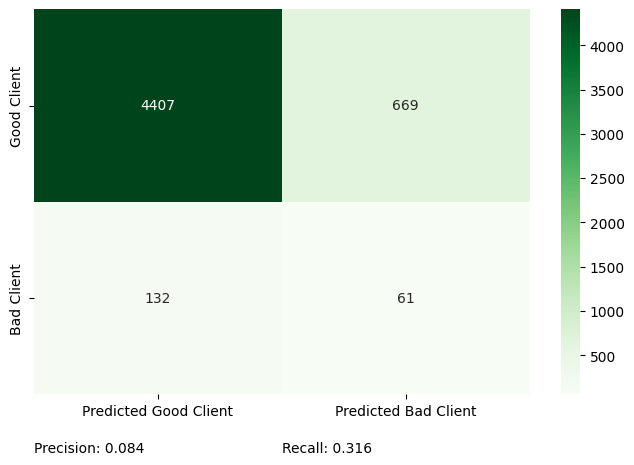

In [1173]:
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(matrix, annot=True, cmap="Greens", fmt='g')
ax = generate_confusion_matrix(ax, matrix)
plt.show()